Define constants

In [1]:
from os import getcwd, path
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = getcwd()

# GLOVE_UTILS = path.join(BASE_PATH, 'glove_utils.py')
DATA_UTILS = path.join(BASE_PATH, 'data_utils.py')
CONV_MODEL = path.join(BASE_PATH, 'convnet/train.py')
MODEL_PATH = path.join(BASE_PATH, 'convnet/model/model.h5')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')

In [2]:
# exec(open(GLOVE_UTILS).read())
# print_top_similar('hello', count=10)
exec(open(DATA_UTILS).read())
exec(open(CONV_MODEL).read())

/Users/2359media/anaconda/envs/botbot-nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Use functions from the utils to extract and preprocess the training data

In [3]:
from keras.utils import to_categorical

X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    to_categorical(classes.index(item), num_classes=num_classes)
    for item in y_data
], dtype='float32')

Plot the training data

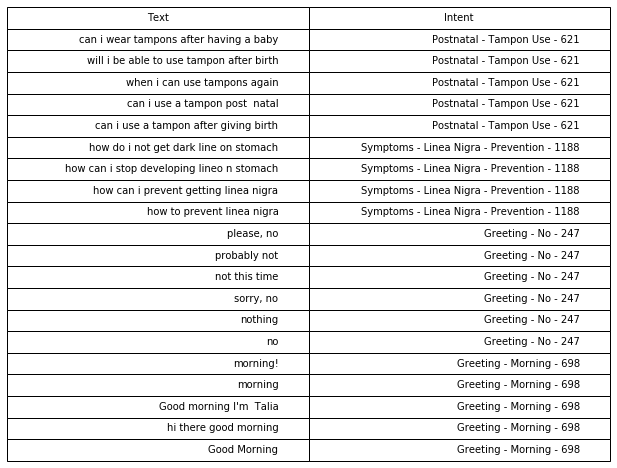

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(np.argmax(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [ ]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Train starting from a previous model if exists or start the training from scratch
- Use `non_static=False` to avoid adding the non-static channel (performance boost, sacrifices accuracy)
- Use `use_tqdm=False` to use Keras original stdout instead

In [ ]:
train_model(X_train, y_train, classes=classes, model_path=MODEL_PATH) # disable non-static channel for faster training

Importing /Users/2359media/Documents/botbot-nlp/data/glove/glove.6B.300d.pickle...
Tokenizer contains 20989 unique tokens
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512)          0                                            
__________________________________________________________________________________________________
static_embeddings (Embedding)   (None, 512, 300)     6297000     input_1[0][0]                    
__________________________________________________________________________________________________
non_static_embeddings (Embeddin (None, 512, 300)     6297000     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 512, 46)      0                                

HBox(children=(IntProgress(value=0, description='Training', max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=10256), HTML(value='')))


Epoch 00002: loss improved from inf to 5.63268, saving model to /Users/2359media/Documents/botbot-nlp/convnet/model/weights-02-5.6327.h5


HBox(children=(IntProgress(value=0, description='Epoch 2', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=10256), HTML(value='')))


Epoch 00004: loss improved from 5.63268 to 2.10524, saving model to /Users/2359media/Documents/botbot-nlp/convnet/model/weights-04-2.1052.h5


HBox(children=(IntProgress(value=0, description='Epoch 4', max=10256), HTML(value='')))